In [52]:
%matplotlib inline
import twopoint
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
ref_file='sim_fiducial_maglim_lensnz_fixednu.fits'

In [5]:
T1 = twopoint.TwoPointFile.from_fits(ref_file)

In [9]:
len(T1.kernels[0].nzs)

4

In [13]:
T1.kernels[0].nzs[2]

array([ 1.68927628e-02,  1.77475624e-02,  1.89635929e-02,  2.05408542e-02,
        2.24793464e-02,  2.47790695e-02,  2.74400234e-02,  3.04622082e-02,
        3.38456239e-02,  3.75902704e-02,  4.16961477e-02,  4.61632560e-02,
        5.09915950e-02,  5.73677144e-02,  6.00242080e-02,  6.95301610e-02,
        7.69384200e-02,  8.20854854e-02,  8.87164541e-02,  9.36554940e-02,
        9.54490285e-02,  9.59082443e-02,  9.78678518e-02,  1.05152060e-01,
        1.16180531e-01,  1.24371734e-01,  1.31819068e-01,  1.47346723e-01,
        1.64127077e-01,  1.75763777e-01,  1.88426827e-01,  1.99474248e-01,
        2.06875755e-01,  2.14608486e-01,  2.21392408e-01,  2.30704340e-01,
        2.41235594e-01,  2.42502573e-01,  2.45988974e-01,  2.57662389e-01,
        2.70492796e-01,  2.79100780e-01,  2.90257533e-01,  3.06035042e-01,
        3.24389441e-01,  3.44219158e-01,  3.75710480e-01,  3.71452305e-01,
        3.62293203e-01,  3.90233948e-01,  4.62694093e-01,  5.58912432e-01,
        6.66195542e-01,  

In [19]:
nz_source = twopoint.NumberDensity('nz_source', zlow=T1.kernels[0].zlow, z=T1.kernels[0].z, zhigh=T1.kernels[0].zhigh, nzs=[T1.kernels[0].nzs[2]])


In [20]:
kernels = []
kernels.append(nz_source)

In [21]:
kernels

In [23]:
kernels[0].nzs

[array([ 1.68927628e-02,  1.77475624e-02,  1.89635929e-02,  2.05408542e-02,
         2.24793464e-02,  2.47790695e-02,  2.74400234e-02,  3.04622082e-02,
         3.38456239e-02,  3.75902704e-02,  4.16961477e-02,  4.61632560e-02,
         5.09915950e-02,  5.73677144e-02,  6.00242080e-02,  6.95301610e-02,
         7.69384200e-02,  8.20854854e-02,  8.87164541e-02,  9.36554940e-02,
         9.54490285e-02,  9.59082443e-02,  9.78678518e-02,  1.05152060e-01,
         1.16180531e-01,  1.24371734e-01,  1.31819068e-01,  1.47346723e-01,
         1.64127077e-01,  1.75763777e-01,  1.88426827e-01,  1.99474248e-01,
         2.06875755e-01,  2.14608486e-01,  2.21392408e-01,  2.30704340e-01,
         2.41235594e-01,  2.42502573e-01,  2.45988974e-01,  2.57662389e-01,
         2.70492796e-01,  2.79100780e-01,  2.90257533e-01,  3.06035042e-01,
         3.24389441e-01,  3.44219158e-01,  3.75710480e-01,  3.71452305e-01,
         3.62293203e-01,  3.90233948e-01,  4.62694093e-01,  5.58912432e-01,
         6.6

In [41]:
theta, xip, xiperr, xim, ximerr = np.loadtxt("xipm_20828.txt").T

In [42]:
theta

array([1.16352398, 1.52611228, 2.03057222, 2.70406874, 3.59296538,
       4.73383009, 6.18607869, 7.78774384])

In [43]:
spectra = []
npoints = int(len(theta))

In [44]:
# Other info needed for the twopoint file:
windows = "SAMPLE"
angular_bin = []
angle       = []
bin1        = []
bin2        = []

for i in range(1, 1+1):
    for j in range(i,1+1):
        bin1.append(np.repeat(i, npoints))
        bin2.append(np.repeat(j, npoints))
        angle.append(theta)
        angular_bin.append(np.arange(npoints))

In [45]:
#Convert all the lists of vectors into long single vectors
bin1 = np.concatenate(bin1)
bin2 = np.concatenate(bin2)
angle = np.concatenate(angle)
angular_bin = np.concatenate(angular_bin)
bins = (bin1, bin2)

In [46]:
s = twopoint.SpectrumMeasurement('xip', bins, 
                                 (twopoint.Types.galaxy_shear_plus_real, twopoint.Types.galaxy_shear_plus_real), 
                                 ('nz_source', 'nz_source'), windows, angular_bin, value=xip, 
                                 angle=angle, angle_unit = 'arcmin')

print(s.get_pair(1,1))
print(s.value)
spectra.append(s)

(array([1.16352398, 1.52611228, 2.03057222, 2.70406874, 3.59296538,
       4.73383009, 6.18607869, 7.78774384]), array([1.89545486e-06, 2.40817300e-06, 3.04123675e-06, 2.04044745e-06,
       2.35346831e-06, 1.95403995e-06, 6.05597525e-07, 3.23814278e-09]))
[1.89545486e-06 2.40817300e-06 3.04123675e-06 2.04044745e-06
 2.35346831e-06 1.95403995e-06 6.05597525e-07 3.23814278e-09]


In [47]:
s = twopoint.SpectrumMeasurement('xim', bins, 
                                 (twopoint.Types.galaxy_shear_minus_real, twopoint.Types.galaxy_shear_minus_real), 
                                 ('nz_source', 'nz_source'), windows, angular_bin, value=xim, 
                                 angle=angle, angle_unit = 'arcmin')

print(s.get_pair(1,1))
print(len(s.value))
spectra.append(s)

(array([1.16352398, 1.52611228, 2.03057222, 2.70406874, 3.59296538,
       4.73383009, 6.18607869, 7.78774384]), array([-4.22195343e-07, -1.15856204e-06, -4.18137795e-08,  3.63846482e-08,
       -1.44600827e-07,  2.63164560e-07, -5.47364695e-07, -2.16699364e-06]))
8


In [48]:
data = twopoint.TwoPointFile(spectra, kernels, None, None)
data.to_fits('xipm_20828.fits', overwrite=True)

### Comparison to shear model

In [50]:
theta, xip, xiperr, xim, ximerr = np.loadtxt("xipm_20829.txt").T

In [62]:
theory_folder = '/Users/annaporredon/Codes/cosmosis/charge_diff_20829/'
theta_theory = np.loadtxt(theory_folder+'shear_xi_plus/theta.txt')
xip_th = np.loadtxt(theory_folder+'shear_xi_plus/bin_1_1.txt')
xim_th = np.loadtxt(theory_folder+'shear_xi_minus/bin_1_1.txt')

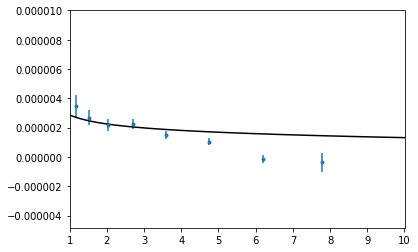

In [65]:
plt.errorbar(theta, xip, yerr=xiperr, marker='.', linestyle='')
plt.plot(theta_theory*180*60/math.pi, xip_th, linestyle='-', color='k')
plt.xlim(left=1, right=10)
plt.ylim(top=1e-5)
plt.savefig('charge_diff_20829.png')

(-1.9247906305430462e-06, 1e-05)

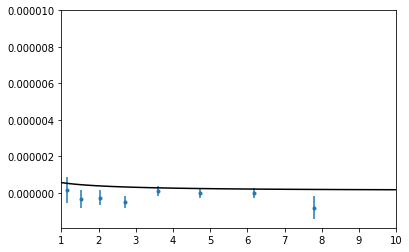

In [64]:
plt.errorbar(theta, xim, yerr=ximerr, marker='.', linestyle='')
plt.plot(theta_theory*180*60/math.pi, xim_th, linestyle='-', color='k')
plt.xlim(left=1, right=10)
plt.ylim(top=1e-5)

In [68]:
theta, xip, xiperr, xim, ximerr = np.loadtxt("xipm_20828.txt").T

In [69]:
theory_folder = '/Users/annaporredon/Codes/cosmosis/charge_diff_20828/'
theta_theory = np.loadtxt(theory_folder+'shear_xi_plus/theta.txt')
xip_th = np.loadtxt(theory_folder+'shear_xi_plus/bin_1_1.txt')
xim_th = np.loadtxt(theory_folder+'shear_xi_minus/bin_1_1.txt')

(-4.759659564204369e-06, 1e-05)

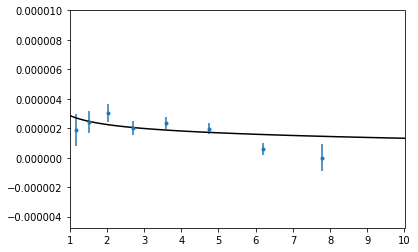

In [70]:
plt.errorbar(theta, xip, yerr=xiperr, marker='.', linestyle='')
plt.plot(theta_theory*180*60/math.pi, xip_th, linestyle='-', color='k')
plt.xlim(left=1, right=10)
plt.ylim(top=1e-5)

(-3.6519371939094778e-06, 1e-05)

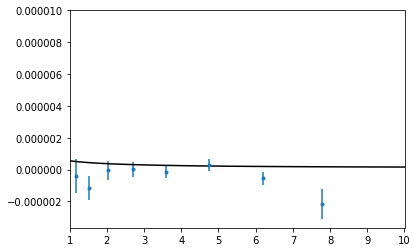

In [71]:
plt.errorbar(theta, xim, yerr=ximerr, marker='.', linestyle='')
plt.plot(theta_theory*180*60/math.pi, xim_th, linestyle='-', color='k')
plt.xlim(left=1, right=10)
plt.ylim(top=1e-5)

In [72]:
theta, xip, xiperr, xim, ximerr = np.loadtxt("xipm_20663.txt").T

In [78]:
theory_folder = '/Users/annaporredon/Codes/cosmosis/charge_diff_20663/'
theta_theory = np.loadtxt(theory_folder+'shear_xi_plus/theta.txt')
xip_th = np.loadtxt(theory_folder+'shear_xi_plus/bin_1_1.txt')
xim_th = np.loadtxt(theory_folder+'shear_xi_minus/bin_1_1.txt')

(-1.0569496784369553e-06, 1e-05)

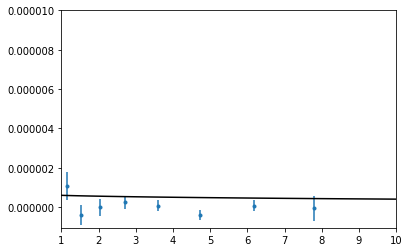

In [79]:
plt.errorbar(theta, xip, yerr=xiperr, marker='.', linestyle='')
plt.plot(theta_theory*180*60/math.pi, xip_th, linestyle='-', color='k')
plt.xlim(left=1, right=10)
plt.ylim(top=1e-5)

(-1.3961628197500856e-06, 1e-05)

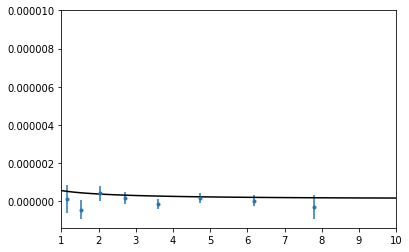

In [75]:
plt.errorbar(theta, xim, yerr=ximerr, marker='.', linestyle='')
plt.plot(theta_theory*180*60/math.pi, xim_th, linestyle='-', color='k')
plt.xlim(left=1, right=10)
plt.ylim(top=1e-5)